# Confusion Matrix Visualizer
The `ConfusionMatrix` visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores they provide deeper insight into the classification of individual data points. 

Below are a few examples of using the ConfusionMatrix visualizer; more information can be found by looking at the sklearn.metrics.confusion_matrix documentation. 

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
#First do our imports
#We want yellowbrick to import from this repository, and assume this notebook is in repofolder/examples/subfolder/
import sys
sys.path.append("../")
import yellowbrick

from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

C:\Users\humph\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


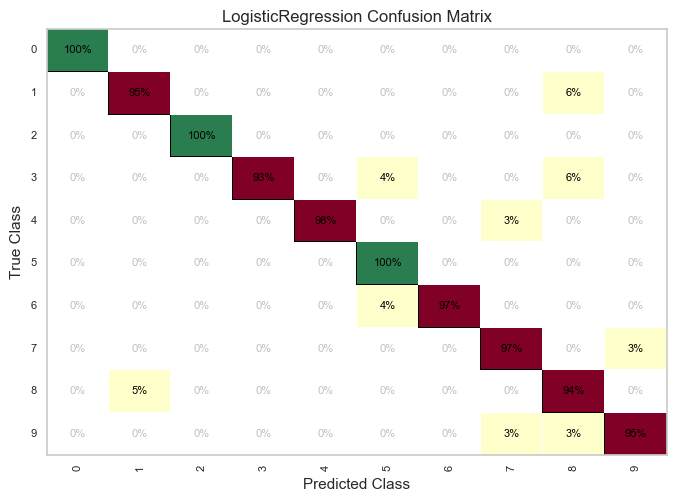

In [3]:
# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=11)

model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn. 
cm.score(X_test, y_test)

#How did we do?
cm.poof()

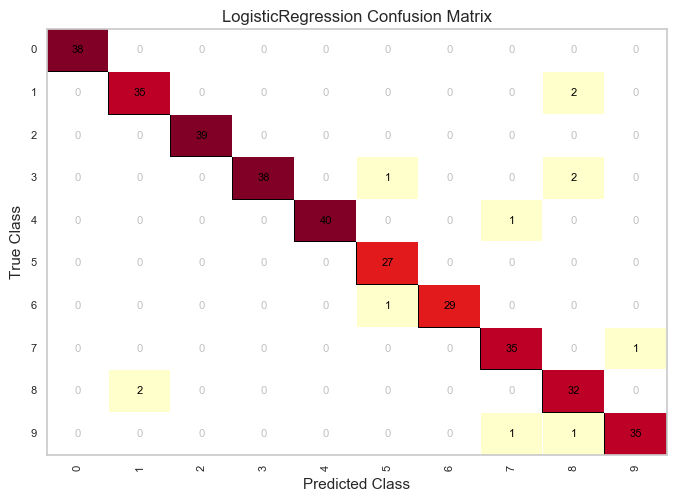

In [4]:
#The default version reports the predicted values as a percent of each 'True' class
#Thus, the 100% values (coded in green) indicate that the predictions were 100% accurate for that class

#We can also get total counts from the test data, instead of percent
#In this example, our heatmap tells a slightly different story, since there's a slight class imbalance
cm2 = ConfusionMatrix(model, classes=None)  #classes can be auto-calculated
cm2.fit(X_train, y_train)
cm2.score(X_test, y_test, percent=False)
cm2.poof()

# Example with more classes (33) and worse predictions


In [5]:
#Another example
#This whole cell is just setting up X and y - it's a bit messier data set

#Be sure to add the relevant file to the /data folder, from the UCI ML library
#available here: https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music
"""
The data set in this example represents 1059 songs from various countries obtained 
from the UCI Machine Learning library. Various features of the audio tracks have been 
extracted, and each track has been tagged with the latitude and longitude of the capital
city of its country of origin. 

We'll treat this as a classification problem, and attempt to train a model to predict 
the country of origin of each model. 

Data source did not specifify what the audio features specifically are, just
    "In the 'default_features_1059_tracks.txt' file, the first 68 columns are audio 
    features of the track, and the last two columns are the origin of the music, 
    represented by latitude and longitude. 

    In the 'default_plus_chromatic_features_1059_tracks.txt' file, the first 116 
    columns are audio features of the track, and the last two columns are the 
    origin of the music."
"""

import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.multiclass import unique_labels
import sys

#First get the data. The UCI ML Library distributes it as a zipped file;
#download the data and extract the two provided files to the 'data' folder before continuing
music_df = pd.read_csv('data\default_plus_chromatic_features_1059_tracks.txt', header=None)
music = music_df.as_matrix()


#Our features are all but the last two columns
X = music[:,0:-2]

#Since feature names were not given, we'll just assign strings with an incrementing integer
names = np.linspace(start=1, stop=116, num=116, dtype='int').tolist()
for idx, name in enumerate(names):
    names[idx] = "Feature " + str(name)


#The source data said that each song as tied to the capital city of it's origin country via a lat/lon pair. 
#Let's treat this as a multi-class classification problem. 
#Rather than reverse-geocoding, we'll just make a string out of the unique lat/lon pairs
lats = ["%.2f" % lat for lat in music_df[116]]
lons = ["%.2f" % lon for lon in music_df[117]]
song_latlons = []
for index, value in enumerate(lats):
    city_id = lats[index] + "," + lons[index]
    song_latlons.append(city_id)

unique_latlons = unique_labels(song_latlons)
city_options = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG']
city_name_map = {}
for idx,latlon in enumerate(unique_latlons):
    city_name_map[latlon] = city_options[idx]

ylist = []
for latlon in song_latlons:
    ylist.append(city_name_map[latlon])
y = np.array(ylist)

In [6]:
X_train_music, X_test_music, y_train_music, y_test_music = train_test_split(X,y, test_size =0.2, random_state=11)


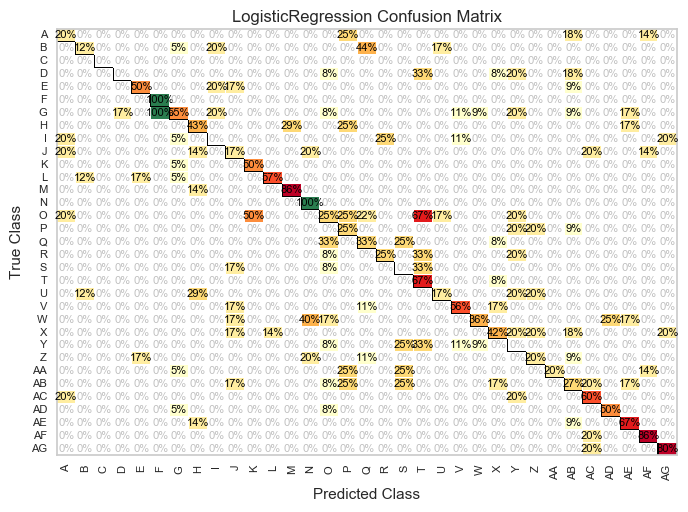

In [7]:
#Similar to our approach above
music_model = LogisticRegression()
music_model.fit(X_train_music, y_train_music)

cm3 = ConfusionMatrix(music_model, classes=city_options)

#We don't need to call fit if the model is already fit
#cm3.fit()
cm3.score(X_test_music, y_test_music, percent=True)

#The diagonal line, not as obvious in the previous example, shows us where our correct predictions are
cm3.poof()

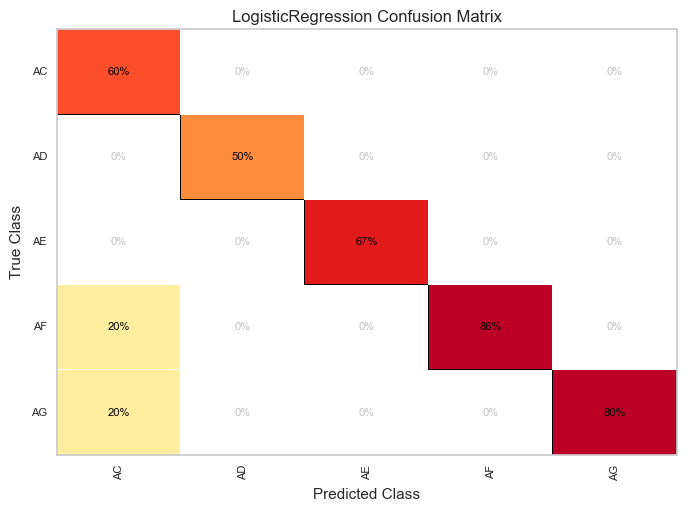

In [8]:
#We can also use the classes option to zoom in on a subset of the matrix
cm4 = ConfusionMatrix(music_model, classes=["AC","AD","AE","AF","AG"])
cm4.score(X_test_music, y_test_music, percent=True)
cm4.poof()